In [1]:
num_of_probes = 3
num_of_target_probes = 52

In [2]:
import socket
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
from datetime import datetime
from scipy.signal import butter, lfilter, freqz, filtfilt

In [3]:
#from scipy.signal import butter, lfilter, freqz, filtfilt
#from matplotlib import pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def filterSignal(sig):
    filtered = sig
    filtered = butter_highpass_filter(filtered, 0.57, 250, order=4)
    filtered = butter_lowpass_filter(filtered, 15, 250, order=2)
    return filtered

In [4]:
def getData():
    data = sock.recv(1000000)
    str_data = data.decode("utf-8")[:-1]
    A=list(map(str, str_data.split(';')))
    result_data = []
    for i in range(len(A)):
        B=list(map(float, A[i].split(',')))
        result_data.append(B)
    df = pd.DataFrame(result_data)
    df = df.transpose()
    df.columns = ["Marker", "Detector 1", "Detector 2", "Detector 3", "Detector 4", "Detector 5", "Detector 6", "Detector 7", "Detector 8"]
    df['Time'] = range(len(df))
    df['Time'] *= 4
    df['Detector 1'] = filterSignal(df['Detector 1'])
    df['Detector 2'] = filterSignal(df['Detector 2'])
    df['Detector 3'] = filterSignal(df['Detector 3'])
    df['Detector 4'] = filterSignal(df['Detector 4'])
    df['Detector 5'] = filterSignal(df['Detector 5'])
    df['Detector 6'] = filterSignal(df['Detector 6'])
    df['Detector 7'] = filterSignal(df['Detector 7'])
    df['Detector 8'] = filterSignal(df['Detector 8'])
    return df

In [5]:
while(True):
    try:
        sock = socket.socket()
        sock.connect(('localhost', 9090))
        print('Connected')
        break
    except ConnectionRefusedError:
        pass

Connected


dd
0 0 1 0 ALL_COUNTERS:  0 0
kk
0 0 2 0 ALL_COUNTERS:  1 0
zzzz
0 1 2 0 ALL_COUNTERS:  1 0
mmmmmm
1 1 2 0 ALL_COUNTERS:  1 1
mmmmmm
1 1 2 1 ALL_COUNTERS:  1 2
mmmmmm
1 1 2 2 ALL_COUNTERS:  1 3
kk


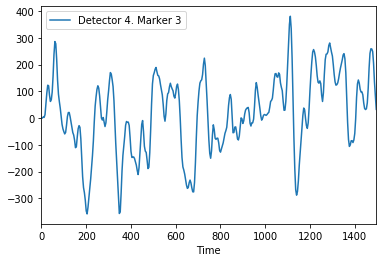

1 1 0 2 ALL_COUNTERS:  2 3
mmmmmm
1 2 0 2 ALL_COUNTERS:  2 4
mmmmmm


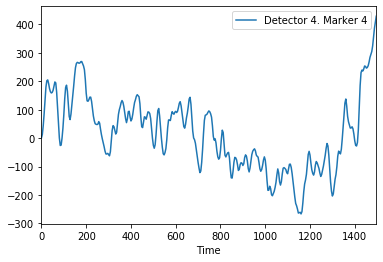

1 2 0 0 ALL_COUNTERS:  2 5
mmmmmm
1 2 0 1 ALL_COUNTERS:  2 6
kk
1 2 1 1 ALL_COUNTERS:  3 6
mmmmmm
2 2 1 1 ALL_COUNTERS:  3 7
mmmmmm


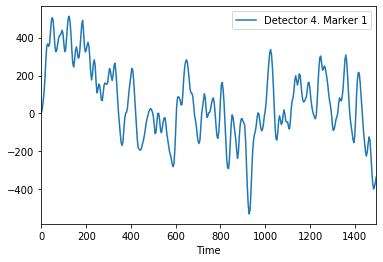

0 2 1 1 ALL_COUNTERS:  3 8
kk
0 2 2 1 ALL_COUNTERS:  4 8


ValueError: could not convert string to float: 

In [6]:
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_all = 0
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
df_3 = pd.DataFrame()
df_4 = pd.DataFrame()

df_all = pd.DataFrame()

df_all_target = pd.DataFrame()
df_all_non_target = pd.DataFrame()

df_all_target_counter = 0
df_all_non_target_counter = 0

while(True):
    df = getData()
    count_all += 1
    if (df_all.empty):
        df_all = df
    else:
        frames = [df_all, df]
        df_all = pd.concat(frames)
    
    if (df_all_target.empty and df['Marker'][100] == 3):
        #print('dd')
        df_all_target = df
    elif(df['Marker'][100] == 3):
        #print('kk')
        frames = [df_all_target, df]
        df_all_target = pd.concat(frames)
        df_all_target_counter += 1
        
    if (df_all_non_target.empty and df['Marker'][100] != 3):
        #print('zzzz')
        df_all_non_target = df
    elif(df['Marker'][100] != 3):
        #print('mmmmmm')
        frames = [df_all_non_target, df]
        df_all_non_target = pd.concat(frames)
        df_all_non_target_counter += 1
        
    
    if (df['Marker'][100] == 1):
        count_1 += 1
        #df.to_excel('RAW_DATA_1_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        if (df_1.empty):
            df_1 = df
        else:
            df_1 += df
    elif (df['Marker'][100] == 2):
        count_2 += 1
        #df.to_excel('RAW_DATA_2_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        if (df_2.empty):
            df_2 = df
        else:
            df_2 += df
    elif (df['Marker'][100] == 3):
        count_3 += 1
        #df.to_excel('RAW_DATA_3_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        if (df_3.empty):
            df_3 = df
        else:
            df_3 += df
    elif (df['Marker'][100] == 4):
        count_4 += 1
        #df.to_excel('RAW_DATA_4_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        if (df_4.empty):
            df_4 = df
        else:
            df_1 += df
    if (count_1 >= num_of_probes):
        df_1 /= num_of_probes
        df_1['Time'] = range(len(df_1))
        df_1['Time'] *= 4
        df_1.plot(x='Time', y='Detector 4', label='Detector 4. Marker 1')
        plt.show()
        df_1['Marker'] = df_1.where(df_1['Marker'] == 0, 1)
        #df_1['Time'] = range(len(df_1))
        df_1.to_excel('1_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        count_1 = 0
        df_1 = pd.DataFrame()
    elif (count_2 >= num_of_probes):
        df_2 /= num_of_probes
        df_2['Time'] = range(len(df_2))
        df_2['Time'] *= 4
        df_2.plot(x='Time', y='Detector 4', label='Detector 4. Marker 2')
        plt.show()
        #df_2['Marker'] = 2
        df_2['Marker'] = df_2.where(df_2['Marker'] == 0, 2)
        #df_2['Time'] = range(len(df_2))
        df_2.to_excel('2_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        count_2 = 0
        df_2 = pd.DataFrame()
    elif (count_3 >= num_of_probes):
        df_3 /= num_of_probes
        df_3['Time'] = range(len(df_3))
        df_3['Time'] *= 4
        df_3.plot(x='Time', y='Detector 4', label='Detector 4. Marker 3')
        plt.show()
        #df_3['Marker'] = 3
        df_3['Marker'] = df_3.where(df_3['Marker'] == 0, 3)
        #df_3['Time'] = range(len(df_3))
        df_3.to_excel('3_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        count_3 = 0
        df_3 = pd.DataFrame()
    elif (count_4 >= num_of_probes):
        df_4 /= num_of_probes
        df_4['Time'] = range(len(df_4))
        df_4['Time'] *= 4
        df_4.plot(x='Time', y='Detector 4', label='Detector 4. Marker 4')
        plt.show()
        #df_4['Marker'] = 4
        df_4['Marker'] = df_4.where(df_4['Marker'] == 0, 4)
        #df_4['Time'] = range(len(df_4))
        df_4.to_excel('4_' + datetime.now().strftime('%Y-%m-%d-%H-%M-%S') + '.xlsx')
        count_4 = 0
        df_4 = pd.DataFrame()
    print(count_1,count_2,count_3,count_4, 'ALL_COUNTERS: ', df_all_target_counter, df_all_non_target_counter)
    if (df_all_target_counter >= num_of_target_probes):
        df_all_target.to_excel('Danya//TARGET_DATA' + '.xlsx')
        print('TARGET DATA SAVED')
        df_all_target = pd.DataFrame()
        
        df_all_non_target.to_excel('Danya//NON_TARGET_DATA' + '.xlsx')
        print('NON TARGET DATA SAVED')
        df_all_non_target = pd.DataFrame()
        
        break
    #print(count_all)
    '''if (count_all >= 120):
        df_all.to_excel('RAW_DATA_2' + '.xlsx')
        print('RAW DATA SAVED')
        df_all = pd.DataFrame()
        count_all = 0'''

df_11 = pd.DataFrame()
df_11 = pd.read_excel('3_2020-02-15-19-00-21.xlsx')
df_11.plot(y='Detector 6', x = 'Time')